In [1]:
#section1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1=pd.read_csv("order.csv")
df2=pd.read_csv("customer.csv")
df3=pd.read_csv("product.csv")
print(df1)
df1.columns=df1.columns.str.strip()
df1.replace("NULL",np.nan,inplace=True)
df1['Quantity'] = pd.to_numeric(df1['Quantity'], errors='coerce')
df1['Quantity'].fillna(df1['Quantity'].median(),inplace=True)
print(df1)
df2.columns=df2.columns.str.strip()
df2.replace("NULL",np.nan,inplace=True)
df2['Age'] = pd.to_numeric(df2['Age'], errors='coerce')
df2['Age'].fillna(df2['Age'].mean(),inplace=True)
print(df2)
cancelled_orders=df1[df1['Order Status'] != " Cancelled"]
print("orders with status cancelled is : \n",cancelled_orders)
df1.drop_duplicates()
print("dropped duplicates in order:\n",df1)
df2.drop_duplicates()
print("dropped duplicate in customer:\n",df2)
df3.drop_duplicates()
print("dropped duplicate products:\n",df3)

          

   Order ID Customer ID Product ID  Quantity Order Status   Order Date 
0      1001        C001       P001       2.0    Delivered   2024-01-10 
1      1002        C002       P002       3.0      Pending   2024-02-05 
2      1003        C003       P003       NaN    Delivered   2024-03-12 
3      1004        C001       P004       4.0    Cancelled   2024-01-15 
4      1005        C004       P002       5.0    Delivered   2024-02-20 
5      1006        C005       P005       1.0    Delivered   2024-01-11 
6      1007        C006       P003       NaN    Delivered   2024-02-13 
7      1008        C007       P006       3.0      Pending   2024-03-05 
8      1009        C008       P002       7.0    Delivered   2024-04-08 
9      1010        C009       P007       5.0    Cancelled   2024-05-01 
   Order ID Customer ID Product ID  Quantity Order Status    Order Date
0      1001        C001       P001       2.0    Delivered   2024-01-10 
1      1002        C002       P002       3.0      Pending   2024

C:\Users\saiba\AppData\Local\Temp\ipykernel_18224\1673766226.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Quantity'].fillna(df1['Quantity'].median(),inplace=True)
C:\Users\saiba\AppData\Local\Temp\ipykernel_18224\1673766226.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [2]:
#section2
orders_products = pd.merge(df1,df3,on="Product ID",how="outer")
merged_df=pd.merge(orders_products,df2,on="Customer ID",how="outer")
print("merged data:\n",merged_df)
merged_df['Order value']=merged_df['Quantity']*merged_df[' Price Per Unit']
print("merged dataframe after adding order value:\n",merged_df)
merged_df1=merged_df[merged_df["Order value"]>500]
print("data frame after filtering order value > 500\n",merged_df1)
x=merged_df.groupby('Country')['Order value'].agg(['sum'])
print("oder value for each country:\n",x)
total_sales=merged_df.groupby(' Product Name')['Order value'].sum().reset_index()
total_sales.rename(columns={"Order value":"Total_sales"})
total_sales.columns=[" Product Name","Total_sales"]
total_sales.sort_values("Total_sales",ascending=0,inplace=True)
print("total sales for each country:\n",total_sales)
print("top 5 products with highest sales")
total_sales.head(5)


merged data:
    Order ID Customer ID Product ID  Quantity Order Status    Order Date  \
0      1001        C001       P001       2.0    Delivered   2024-01-10    
1      1004        C001       P004       4.0    Cancelled   2024-01-15    
2      1002        C002       P002       3.0      Pending   2024-02-05    
3      1003        C003       P003       3.5    Delivered   2024-03-12    
4      1005        C004       P002       5.0    Delivered   2024-02-20    
5      1006        C005       P005       1.0    Delivered   2024-01-11    
6      1007        C006       P003       3.5    Delivered   2024-02-13    
7      1008        C007       P006       3.0      Pending   2024-03-05    
8      1009        C008       P002       7.0    Delivered   2024-04-08    
9      1010        C009       P007       5.0    Cancelled   2024-05-01    

        Category      Product Name   Price Per Unit   Stock Quantity   \
0   Electronics            Laptop               800                50   
1   Electronic

Product Name  Total_sales
4    Smartphone        2400.0
1        Laptop        1600.0
0        Jacket        1500.0
5        Tablet        1500.0
2  Office Chair        1050.0

merged_df
   Order ID Customer ID Product ID  Quantity Order Status    Order Date  \
0      1001        C001       P001       2.0    Delivered   2024-01-10    
1      1004        C001       P004       4.0    Cancelled   2024-01-15    
2      1002        C002       P002       3.0      Pending   2024-02-05    
3      1003        C003       P003       3.5    Delivered   2024-03-12    
4      1005        C004       P002       5.0    Delivered   2024-02-20    
5      1006        C005       P005       1.0    Delivered   2024-01-11    
6      1007        C006       P003       3.5    Delivered   2024-02-13    
7      1008        C007       P006       3.0      Pending   2024-03-05    
8      1009        C008       P002       7.0    Delivered   2024-04-08    
9      1010        C009       P007       5.0    Cancelled   2024-05-01    

        Category      Product Name   Price Per Unit   Stock Quantity   \
0   Electronics            Laptop               800                50   
1   Electronics   

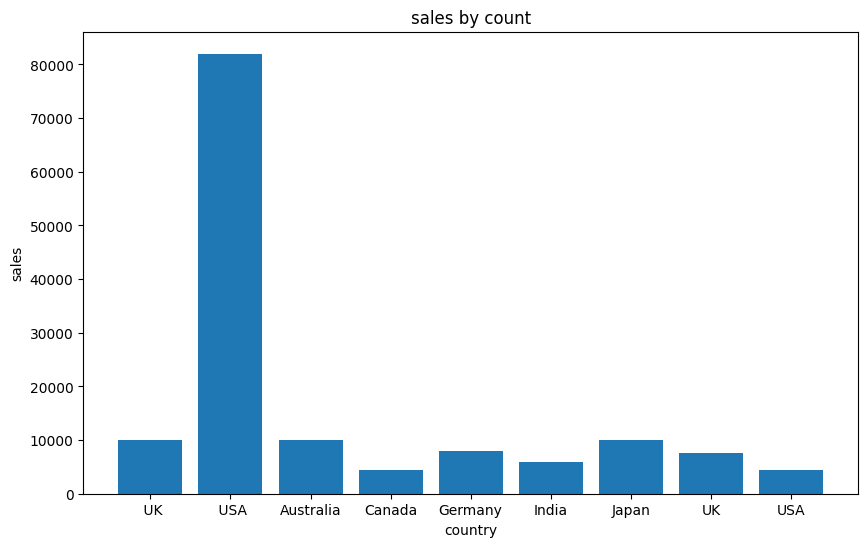

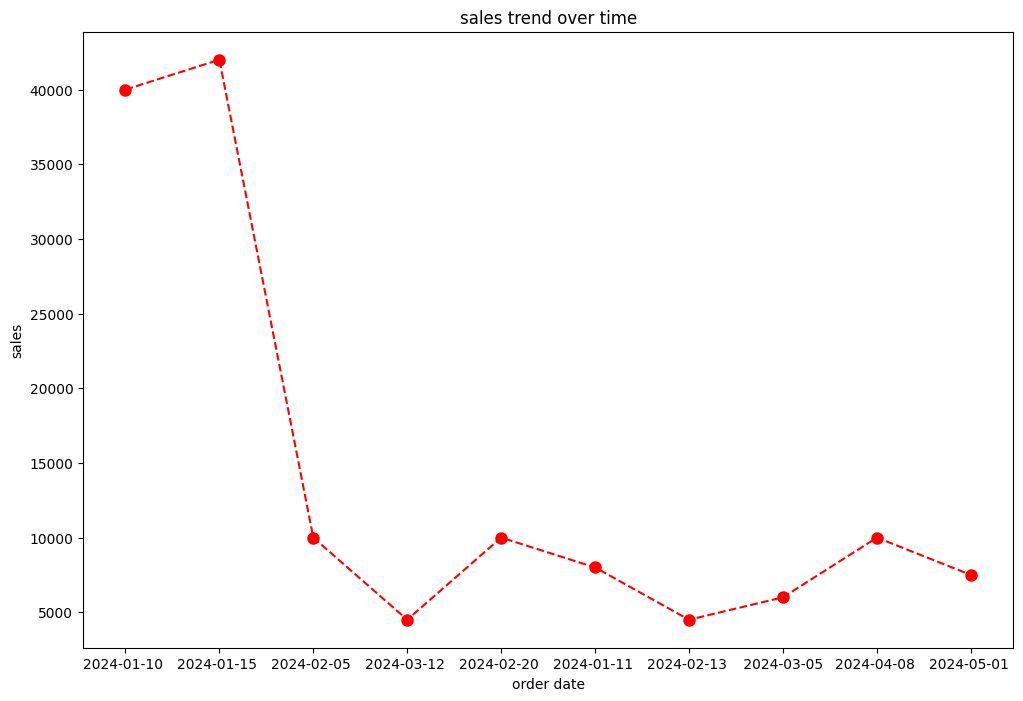

                 Quantity   Price Per Unit  Order value
Quantity         1.000000        -0.404893     0.121184
 Price Per Unit -0.404893         1.000000     0.781848
Order value      0.121184         0.781848     1.000000


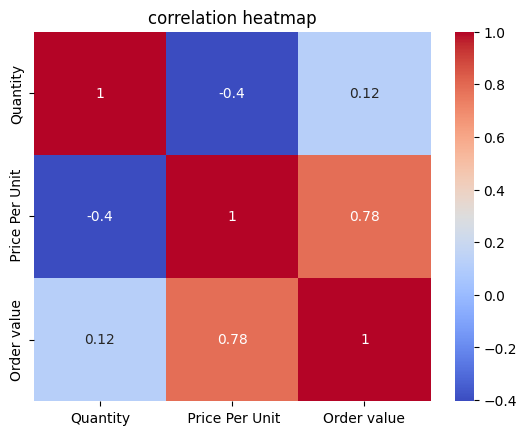

       Product Name  Sales
0           Jacket   30000
1           Laptop   40000
2     Office Chair    9000
3      Python Book    6000
4       Smartphone   42000
5           Tablet    7500
6  Washing Machine    8000


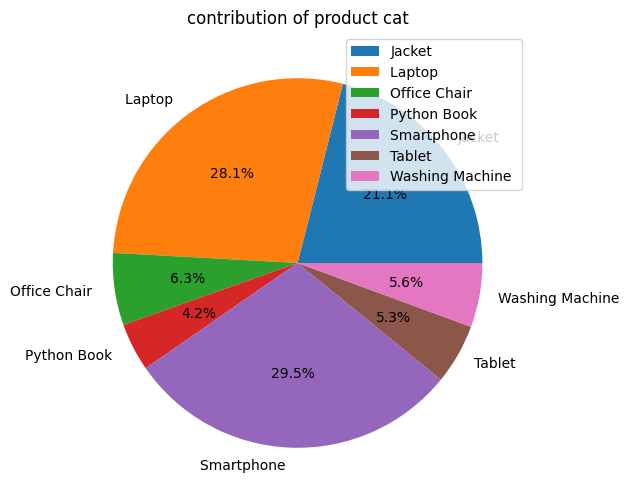

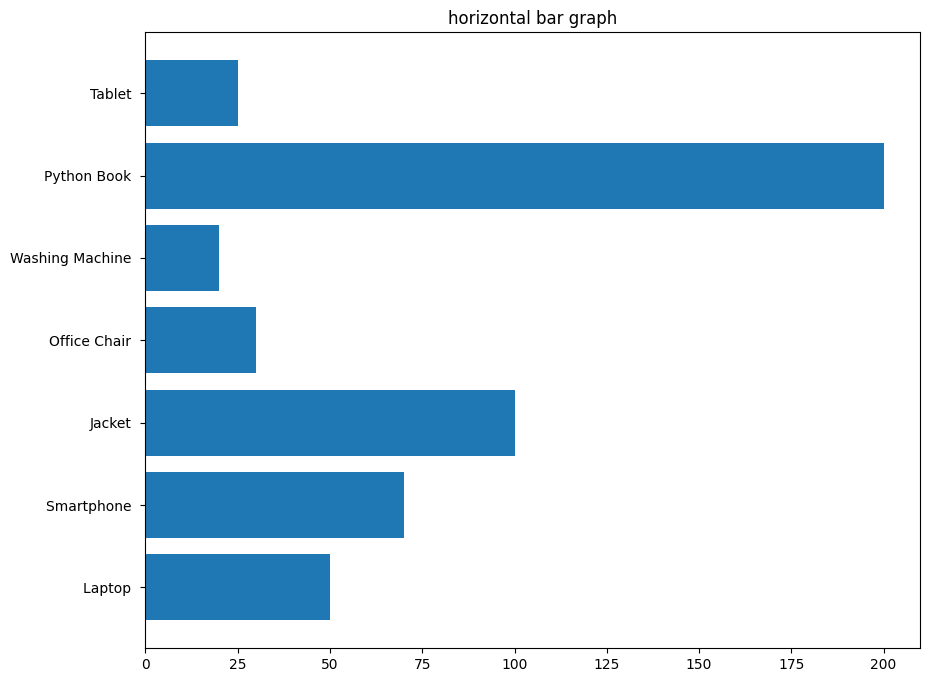

In [8]:
#section 3
merged_df['sales']=merged_df[" Price Per Unit"]*merged_df[" Stock Quantity "]
print("merged_df")
print(merged_df)
barchart=merged_df.groupby("Country")['sales'].sum().reset_index()
print(barchart)
plt.figure(figsize=(10,6))
plt.bar(barchart['Country'],barchart['sales'])
plt.xlabel('country')
plt.ylabel('sales')
plt.title('sales by count')
plt.figure(figsize=(12,8))
plt.plot(merged_df['Order Date'],merged_df['sales'], marker='o', linestyle='--', markersize=8, color='red', label='Scatter Plot')
plt.xlabel('order date')
plt.ylabel('sales')
plt.title('sales trend over time')
plt.show()
correlation = merged_df[['Quantity',' Price Per Unit','Order value']].corr()
print(correlation)
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title("correlation heatmap")
plt.show()
PIE=merged_df.groupby(' Product Name')['sales'].sum()
PIE = PIE.reset_index()
PIE.columns = ['Product Name', 'Sales']  # Rename columns
print(PIE)
plt.figure(figsize=(6,6))
plt.pie(PIE['Sales'],labels=PIE['Product Name'], autopct='%1.1f%%')
plt.title('contribution of product cat')
plt.legend()
plt.show()

plt.figure(figsize=(10,8))
plt.barh(merged_df[' Product Name'],merged_df[" Stock Quantity "])
plt.title('horizontal bar graph')
plt.show()



In [23]:
merged_df["total_Sales"]=merged_df[" Price Per Unit"]*merged_df["Quantity"]
print(merged_df)
customer_sales=merged_df.groupby('Name')['total_Sales'].sum().reset_index()
print(customer_sales)
top_customer = customer_sales.loc[customer_sales['total_Sales'].idxmax()]
print(f"Top Customer: {top_customer['Name']}, Total Sales: {top_customer['total_Sales']}")
merged_df['Order_Value'] = merged_df[" Price Per Unit"] * merged_df['Quantity']
country_avg_order = merged_df.groupby('Country')['Order value'].mean()
top_3_countries = country_avg_order.sort_values(ascending=False).head(3)

print("Top 3 Countries with Highest Average Order Value:")
print(top_3_countries)

   Order ID Customer ID Product ID  Quantity Order Status    Order Date  \
0      1001        C001       P001       2.0    Delivered   2024-01-10    
1      1004        C001       P004       4.0    Cancelled   2024-01-15    
2      1002        C002       P002       3.0      Pending   2024-02-05    
3      1003        C003       P003       3.5    Delivered   2024-03-12    
4      1005        C004       P002       5.0    Delivered   2024-02-20    
5      1006        C005       P005       1.0    Delivered   2024-01-11    
6      1007        C006       P003       3.5    Delivered   2024-02-13    
7      1008        C007       P006       3.0      Pending   2024-03-05    
8      1009        C008       P002       7.0    Delivered   2024-04-08    
9      1010        C009       P007       5.0    Cancelled   2024-05-01    

        Category      Product Name   Price Per Unit   Stock Quantity   \
0   Electronics            Laptop               800                50   
1   Electronics        Smart